In [1]:
import nest
import os
import network
import addons
import numpy as np
from network_params_jesus import net_dict
import network_params_jesus
from sim_params import sim_dict
from stimulus_params import stim_dict


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.7.0
 Built: Apr 15 2024 07:21:32

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



/home/hyc_1/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning:Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.


Initialize the network with simulation, network and stimulation parameters, then create and connect all nodes, and finally simulate. The times for a presimulation and the main simulation are taken independently. A presimulation is useful because the spike activity typically exhibits a startup transient. In benchmark simulations, this transient should be excluded from a time measurement of the state propagation phase. Besides, statistical measures of the spike activity should only be computed after the transient has passed.

Data will be written to: data_background_rate_jesus/20.0/trial_0/
  Directory already existed. Old data will be overwritten.


RNG seed: 55
Total number of virtual processes: 10
Creating neuronal populations.

Jul 29 10:05:24 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.1 ms.
Creating recording devices.
  Creating spike recorders.
  Creating voltmeters.
Creating Poisson generators for background input.
Connecting neuronal populations recurrently.
NodeCollection(metadata=None, model=iaf_psc_exp, size=20683, first=1, last=20683)
NodeCollection(metadata=None, model=iaf_psc_exp, size=5834, first=20684, last=26517)
NodeCollection(metadata=None, model=iaf_psc_exp, size=21915, first=26518, last=48432)
NodeCollection(metadata=None, model=iaf_psc_exp, size=5479, first=48433, last=53911)
NodeCollection(metadata=None, model=iaf_psc_exp, size=4850, first=53912, last=58761)
NodeCollection(metadata=None, model=iaf_psc_exp, size=1065, first=58762, last=59826)
N

/home/hyc_1/CorticalColumn_Github_1/CorticalColumn_Attempts/helpers.py:233: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


Interval to compute firing rates: [  500 60500] ms
Mean rates: [2.269 3.638 3.92  4.416 7.605 4.335 0.81  2.936] spikes/s
Standard deviation of rates: [0.582 1.386 0.809 2.04  0.585 1.798 0.536 1.681] spikes/s
Data will be written to: data_background_rate_jesus/22.82/trial_0/
  Directory has been created.


RNG seed: 55
Total number of virtual processes: 10
Creating neuronal populations.

Jul 29 11:47:56 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.1 ms.
Creating recording devices.
  Creating spike recorders.
  Creating voltmeters.
Creating Poisson generators for background input.
Connecting neuronal populations recurrently.
NodeCollection(metadata=None, model=iaf_psc_exp, size=20683, first=1, last=20683)
NodeCollection(metadata=None, model=iaf_psc_exp, size=5834, first=20684, last=26517)
NodeCollection(metadata=None, model=iaf_psc_exp, size=21915, first=26518, last=48432)
NodeCollection(metadata=None, model=iaf_psc_exp, size=5479, first=48433, l

ValueError: the dtype passed requires 2 columns but 1 were found at row 172647; use `usecols` to select a subset and avoid this error

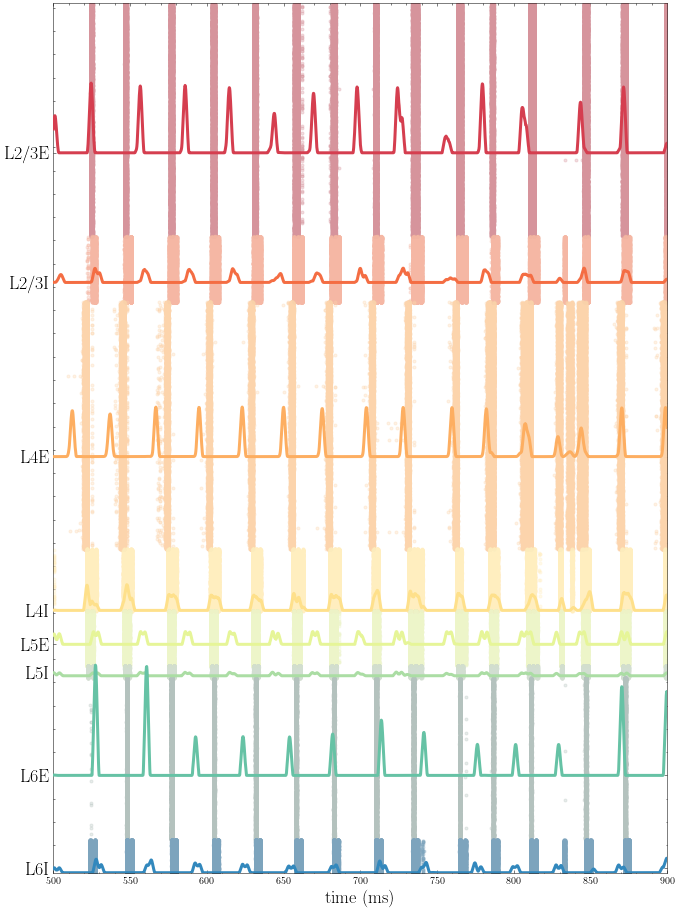

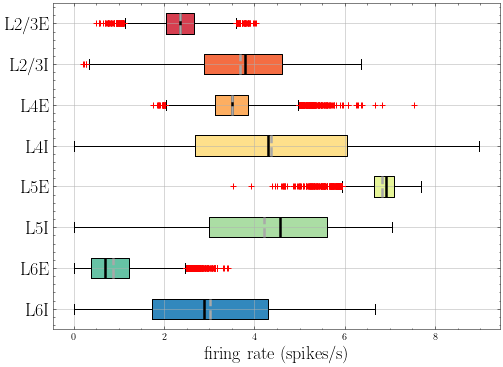

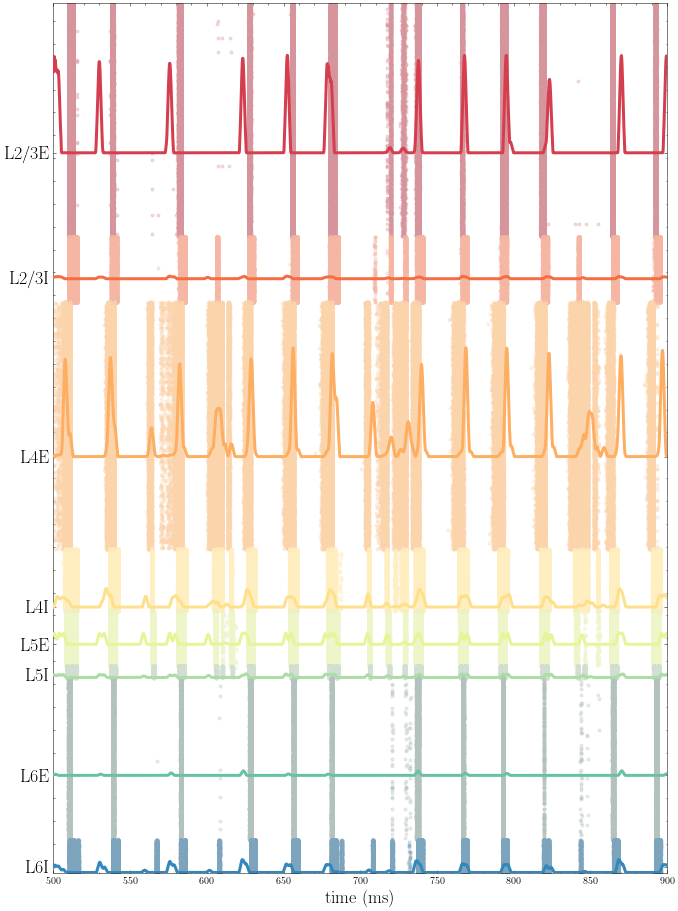

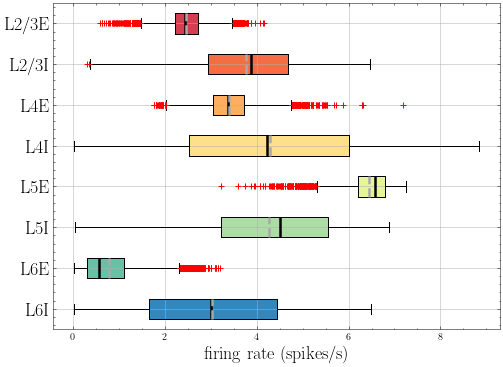

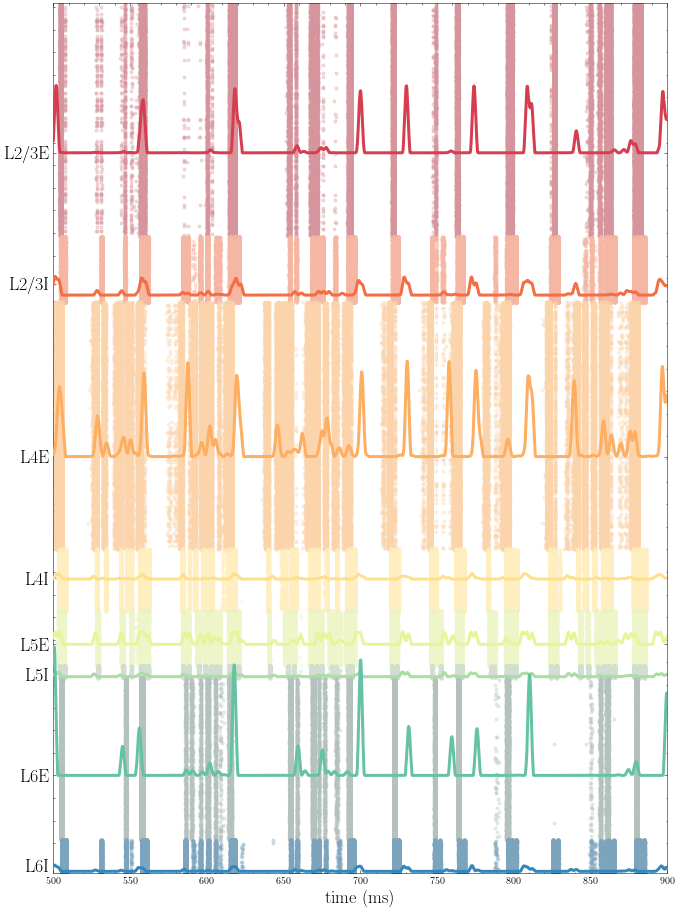

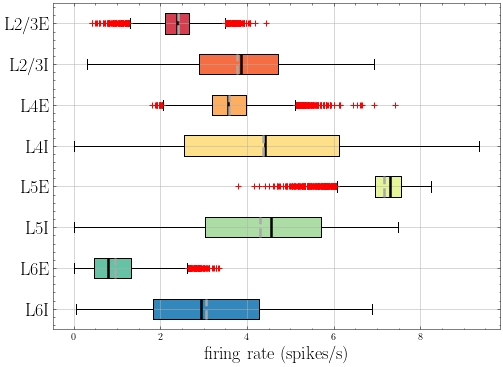

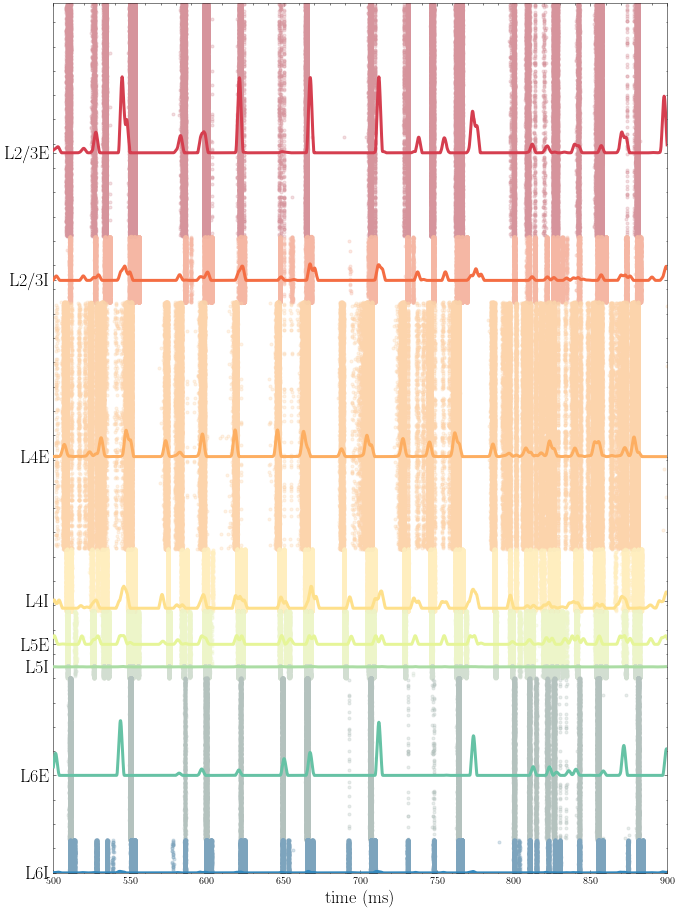

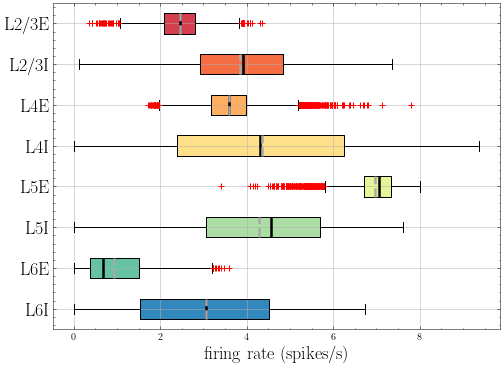

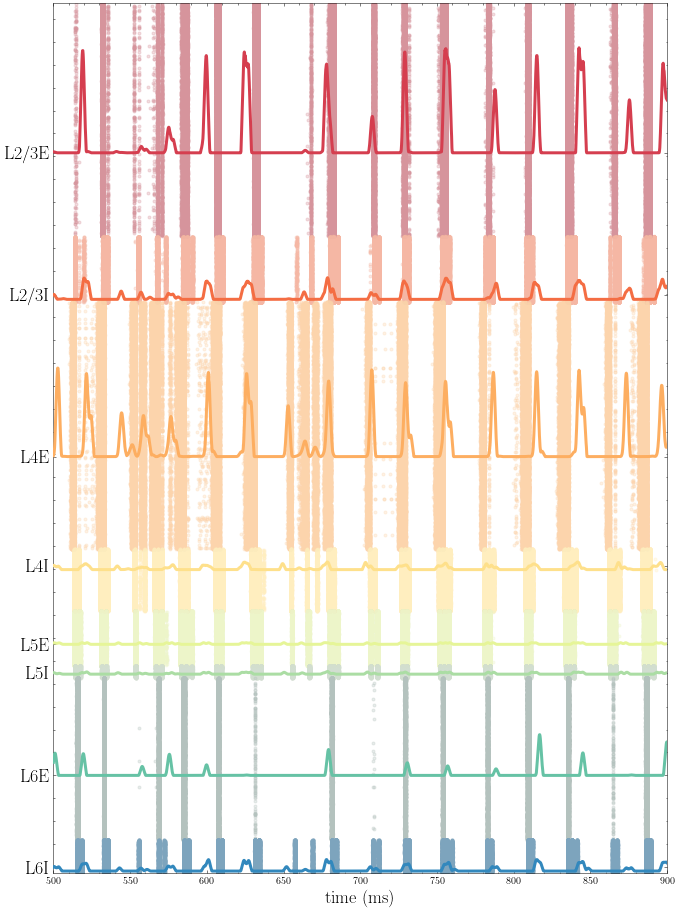

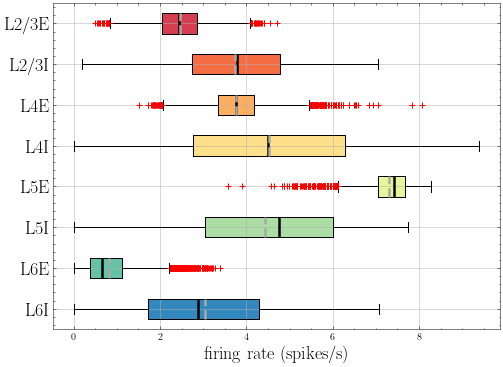

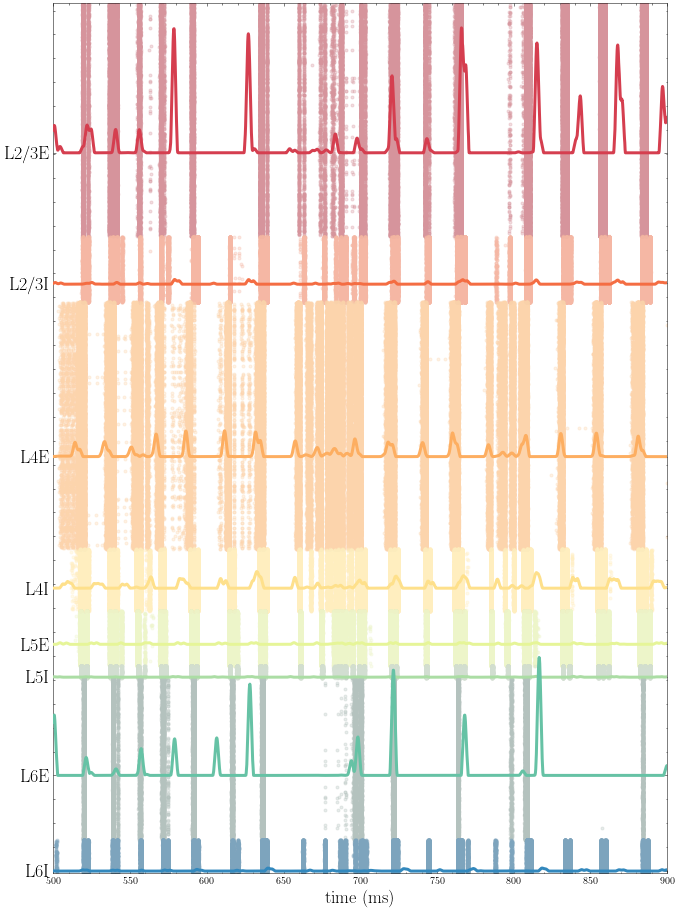

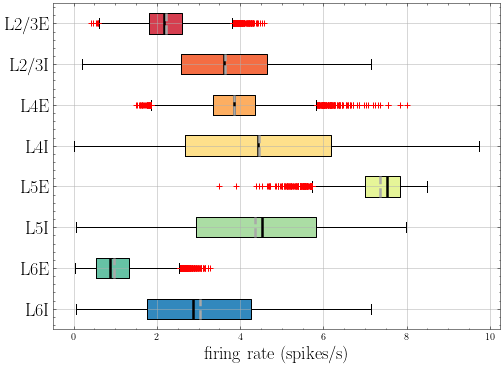

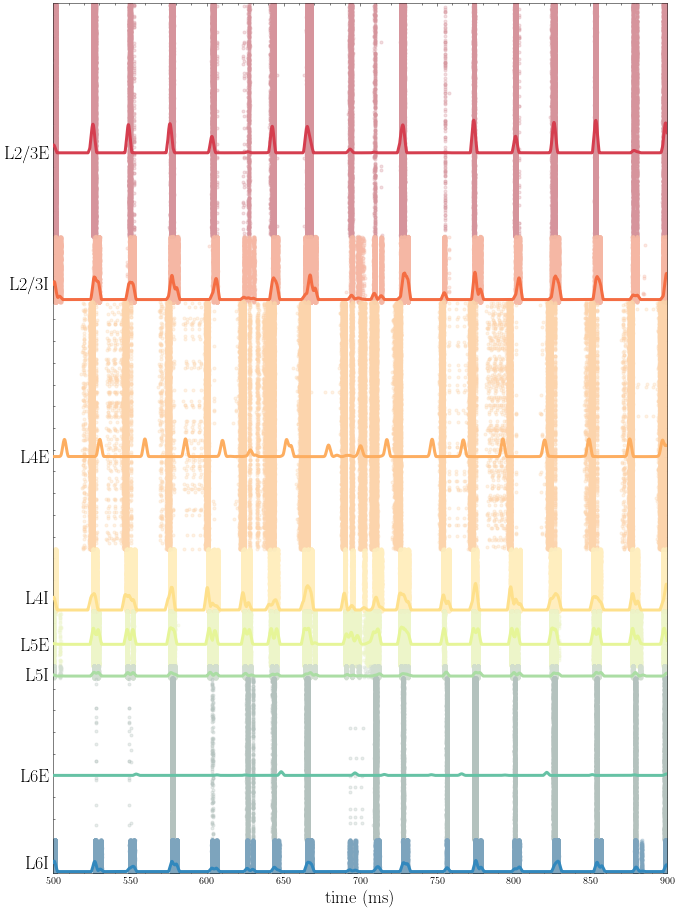

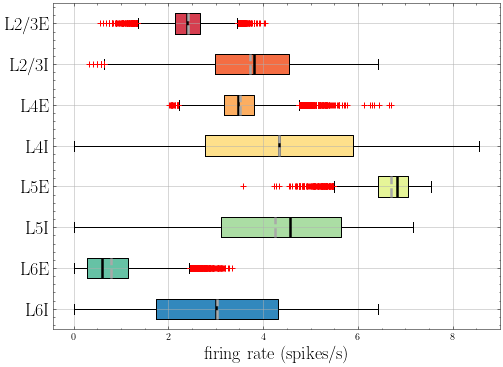

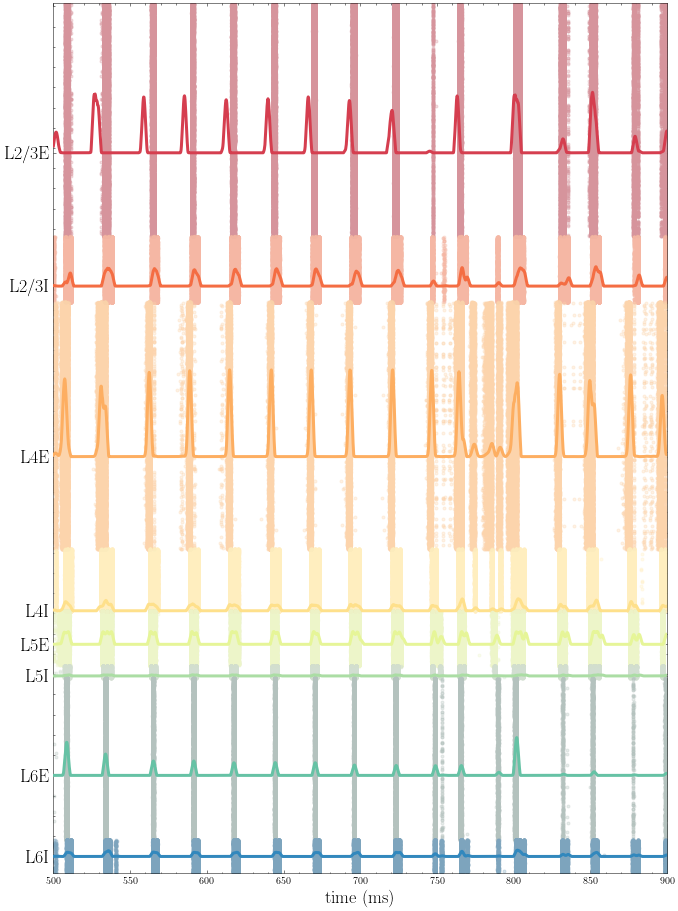

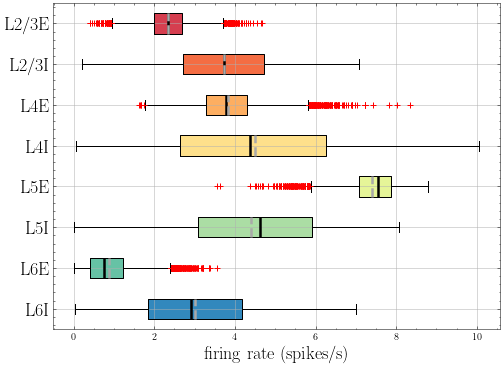

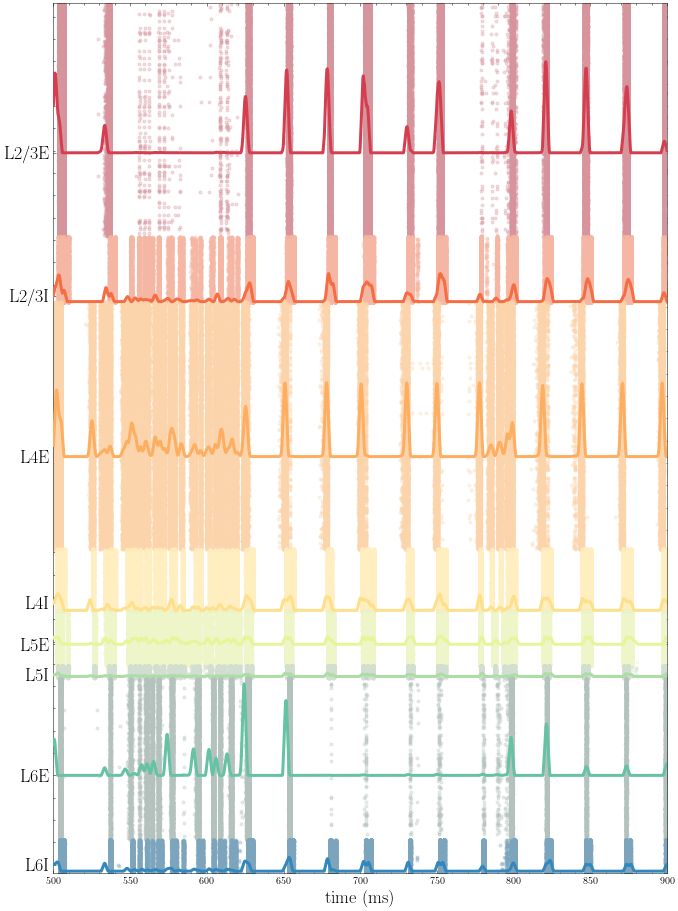

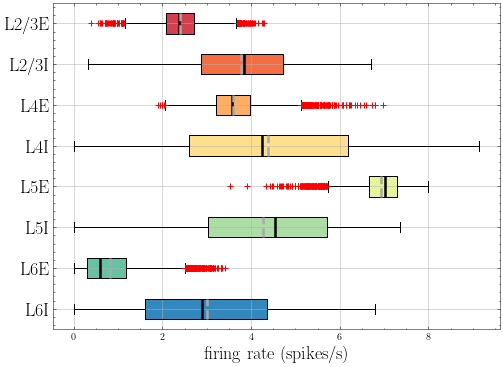

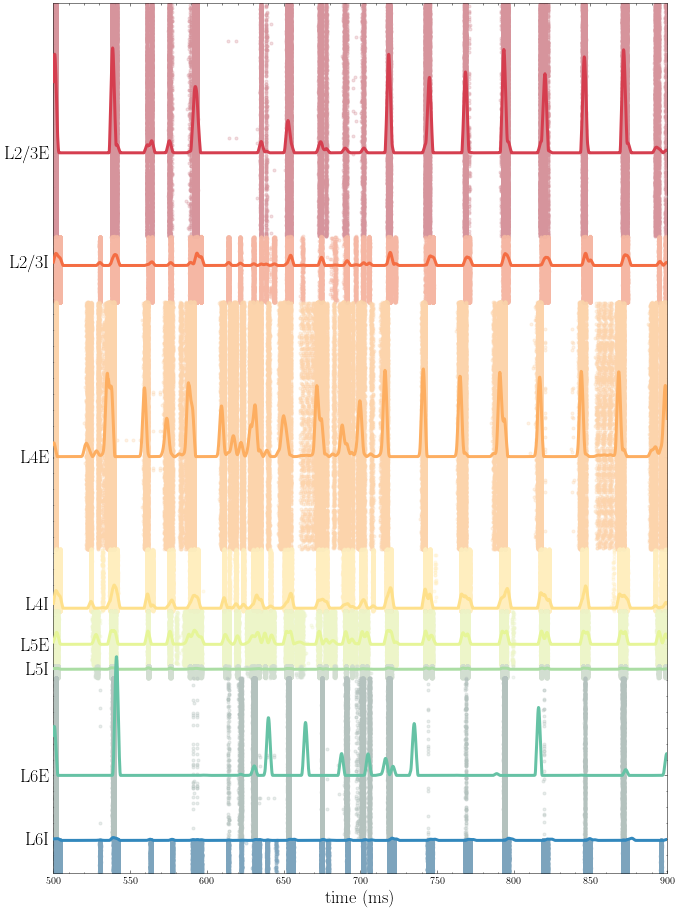

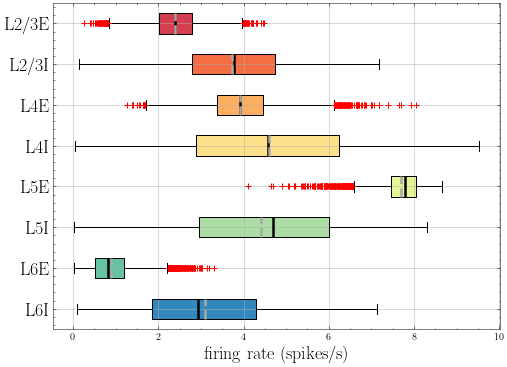

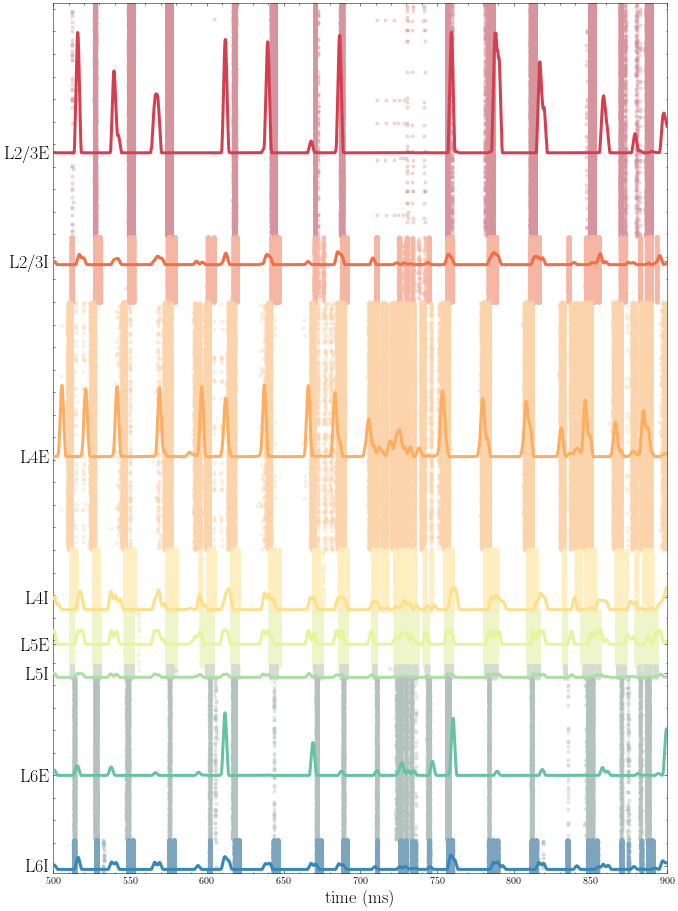

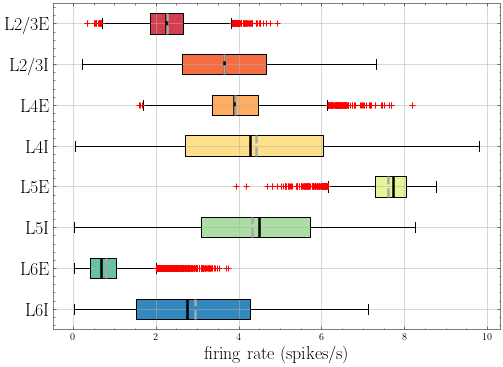

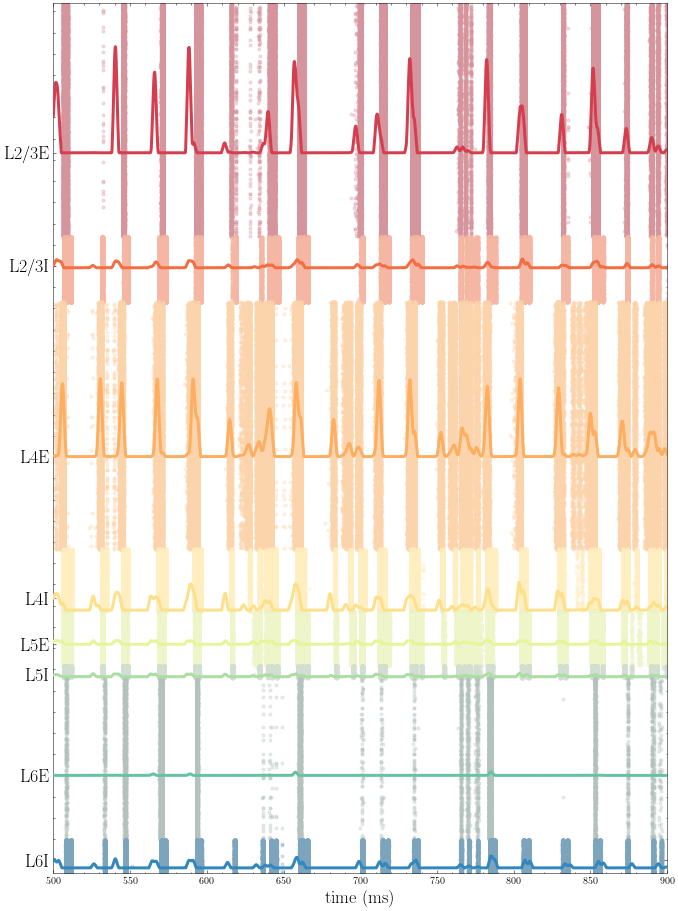

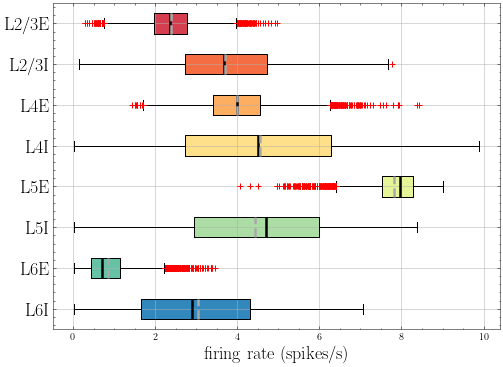

In [5]:
record_synapses = True



bg_rate = np.linspace(20,30,int((10)/0.25))

number_trials = 1


path = "data_background_rate_jesus/"

for i in range(len(bg_rate)):
     if not os.path.exists(path + str(round(bg_rate[i],2))):
        os.makedirs(path + str(round(bg_rate[i],2)))
     for j in range(number_trials):
        nest.ResetKernel()

       
        net = network.Network(sim_dict, net_dict, stim_dict, path = path + str(round(bg_rate[i],2)) + "/trial_"+str(j) + "/", bg_rate= bg_rate[i])

        net.create(rate="random")
        net.connect()
    

        net.simulate(sim_dict["t_presim"])
        net.simulate(sim_dict["t_sim"])
        raster_plot_interval = np.array([500, 900])
        firing_rates_interval = np.array([500,60500])
        pop_activity = net.evaluate(raster_plot_interval, firing_rates_interval,binned=True, plot=False,trial=j)